In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
percentage_people_below_poverty_level = pd.read_csv("/content/drive/MyDrive/data/PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252") 
percent_over_25_completed_highSchool = pd.read_csv("/content/drive/MyDrive/data/PercentOver25CompletedHighSchool.csv", encoding="windows-1252") 

Her bir eyaletteki liseden mezun olma oranıyla fakirlik oranını bir arada çizilecektir.

Böylelikle iki durum arasında bir karşılaştırma yapılacaktır.

Liseden mezun olma oranı yüksekse fakirlik oranının azalması beklenir ya da liseden mezun olma oranının düşük olduğu durumlarda insanlar iş bulmak için okuldan ayrılmış olabilirler.

**Eyaletlere göre Fakirlik Oranı**

In [3]:
percentage_people_below_poverty_level.head()      #Geographic Area -> eyaletler
                                                  #City -> Şehirler
                                                  #poverty_rate -> fakirlik oranı
                                                  #bu datada her bir şehrin fakirlik oranı verilmiştir.
                                                  #ilk önce eyaletlerdeki fakirlik oranının bulunması lazımdır.

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
#poverty_rate sütununda bazı bozuk değerler bulunmaktadır.
#poverty rate sütunundaki '-' değerler 0 ile değiştirilir.
#inplace=True olması bu değişimin kalıcı olduğu anlamına gelir.

In [5]:
percentage_people_below_poverty_level.info()   #poverty rate sütununda string değerler bulunmaktadır.
                                               #burada değerleri karşılaştırabilmek için sayısal değere çevrilmesi gerekir.
                                               #bu değerler bir oran olduğundan floata çevrilmesi gerekir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [6]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
#poverty rate sütunundaki değerler floata çevrilir.

In [7]:
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
#Geographic Area sütunu eyaletleri barındırmaktadır.
#bu eyaletlerden unique olanlarının bulunması için unique methodu kullanılır.

In [8]:
area_poverty_ratio = [] #fakirlik oranının tutulması için boş bir liste yaratılır.

In [9]:
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    #unique eyaletler for each döngüsüyle x değişkenine aktarılır.
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    #eyaletlere göre fakirlik oranı bulunur.
    area_poverty_ratio.append(area_poverty_rate)
    #bu oran listeye eklenir.

In [10]:
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
#bir dataframe oluşturulur.
#unique eyaletler area_list sütununda, eyaletlere göre fakirlik oranı area_poverty_ratio sütununda tutulur.

In [11]:
data.head()

,area_list,area_poverty_ratio
0,AL,20.611795
1,AK,18.678592
2,AZ,25.268071
3,AR,22.963216
4,CA,16.888371


In [12]:
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
#fakirlik oranı ascending=False olduğundan azalan şekilde sıralanır.

In [13]:
sorted_data = data.reindex(new_index)
#fakirlik oranı dataframe'in yeni indeksleri yapılır.

**Eyaletlere göre 25 Yaşından Büyük İnsanların Liseden Mezun Olma Oranı**

In [14]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [15]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
#percent_completed_hs sütununda bazı bozuk değerler bulunmaktadır.
#percent_completed_hs sütunundaki '-' değerler 0 ile değiştirilir.
#inplace=True olması bu değişimin kalıcı olduğu anlamına gelir.

In [16]:
percent_over_25_completed_highSchool.info() #percent_completed_hs sütununda string değerler bulunmaktadır.
                                            #burada değerleri karşılaştırabilmek için sayısal değere çevrilmesi gerekir.
                                            #bu değerler bir oran olduğundan floata çevrilmesi gerekir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [17]:
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
#poverty rate sütunundaki değerler floata çevrilir.

In [18]:
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
#Geographic Area sütunu eyaletleri barındırmaktadır.
#bu eyaletlerden unique olanlarının bulunması için unique methodu kullanılır.

In [19]:
area_highschool = [] #liseden mezun olma oranı için boş bir liste yaratılır.

In [20]:
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    #unique eyaletler for each döngüsüyle x değişkenine aktarılır.
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    #eyaletlere göre liseden mezun olma oranı bulunur.
    area_highschool.append(area_highschool_rate)
    #bu oran listeye eklenir.

In [21]:
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
#bir dataframe oluşturulur.
#unique eyaletler area_list sütununda, eyaletlere göre liseden mezun olma oranı area_highschool_ratio sütununda tutulur.

In [22]:
data.head()

,area_list,area_highschool_ratio
0,AL,80.163419
1,AK,80.098028
2,AZ,79.218182
3,AR,79.949538
4,CA,80.824639


In [23]:
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
#liseden mezun olma oranı ascending=True olduğundan artan şekilde sıralanır.

In [24]:
sorted_data2 = data.reindex(new_index) 
#liseden mezun olma oranı dataframe'in yeni indeksleri yapılır.

In [25]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
#burada normalizasyon yapılır.
#normalizasyonda gözlemler değişir.
#verilerin sabit bir aralığa göre (genellikle 0-1) ölçeklendirilme işlemidir.
#(x-xmin)/(xmax-xmin) formülüdür.
#bu kodda her eyalete göre fakirlik oranı ve liseden mezun olma oranı for each döngüsüyle hesaplandığı için ait oldukları listeleri çağırmak yeterlidir.

In [26]:
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
#concat methoduyla axis=1 olduğundan dataframeler yatay şekilde birleştirilir.

In [27]:
data.head(10) #burada birleştirilmiş dataframe gözükmektedir.
              #area_list -> unique eyaletler
              #area_poverty_ratio -> eyaletlere göre fakirlik oranı
              #area_highschool_ratio -> eyaletlere göre 25 yaşından büyüklerin liseden mezun olma oranı
              #normalizasyon yapmadan önce AL'deki area_poverty_ratio	80.16 iken şu an 0.76'dır.
              #tüm değerlerin 0-1 aralığında olduğu görülür.

,area_list,area_poverty_ratio,area_highschool_ratio
0,AL,0.766687,0.871072
1,AK,0.694778,0.870362
2,AZ,0.939884,0.860801
3,AR,0.854151,0.868748
4,CA,0.628188,0.878257
5,CO,0.490539,0.966290
6,CT,0.339883,0.995254
7,DE,0.467033,0.961871
8,DC,0.669537,0.970352
9,FL,0.651259,0.928600


In [28]:
data.sort_values('area_poverty_ratio',inplace=True) #fakirlik oranı sıralanır.
#ascending değeri belirtilmediğinde default olarak True alınır.
#bu da artan şekilde sıralanacağı anlamına gelir.

In [29]:
data.head() #area_poverty_ratio artan şekilde sıralandığı görülür.

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


# **Point Plot**

Noktalardan oluşan ve arasında bir çizgi olan plot işlemidir.

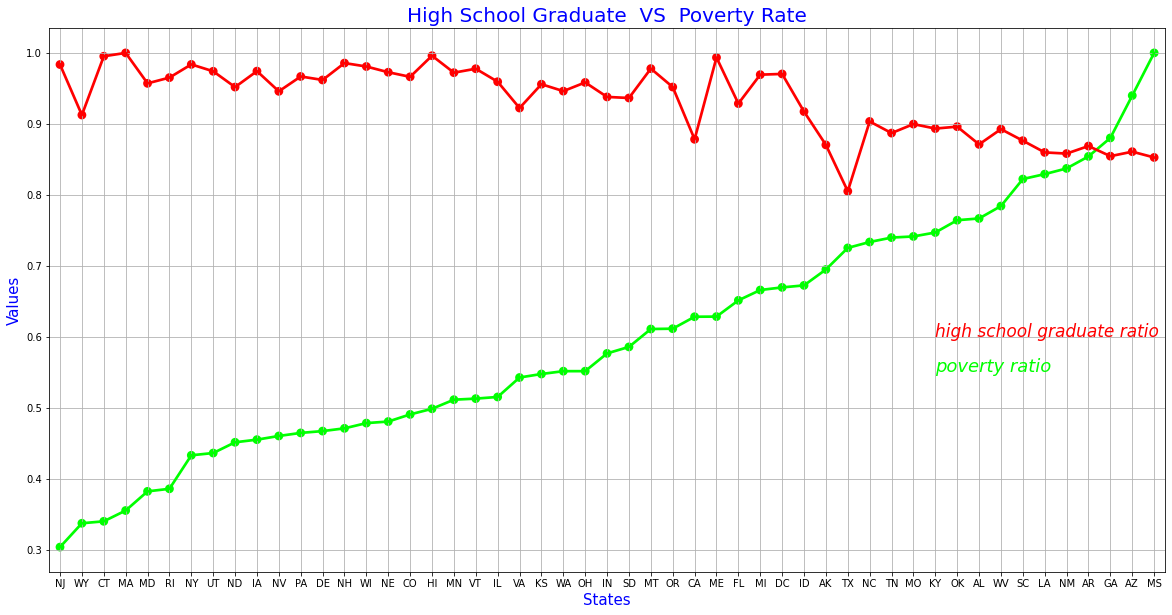

In [30]:
f,ax1 = plt.subplots(figsize =(20,10)) #figür oluşturulur ve boyutu belirlenir.
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
#data=data ilk data seaborn parametresi, ikinci data dataframe'in içinde bulunduğu data
#bu parametreyle dataframedeki sütunların isimleri alınarak x ve y eksenlerine eşitlenir.
#color ayarlanır, alpha ile saydamlık verilir.
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
#hangi rengin hangi orana ait olduğunun anlaşılması için isim verilir.
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue') #x eksenine rengi mavi olacak şekilde isim verilir.
plt.ylabel('Values',fontsize = 15,color='blue') #x eksenine rengi mavi olacak şekilde isim verilir.
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue') #figürün başlığı verilir.
plt.grid() #grid ile dikdörtgenler çizdirilir, böylelikle noktaların ait olduğu değerlerin okunması kolaylaşır.

# **Joint Plot**

Joint plotta tek satırda kod yazılır.

Bu plot işleminde tekrardan eyaletlere göre 25 yaşından büyük olanların liseden mezun olma oranıyla fakirlik oranı karşılaştırılacaktır.

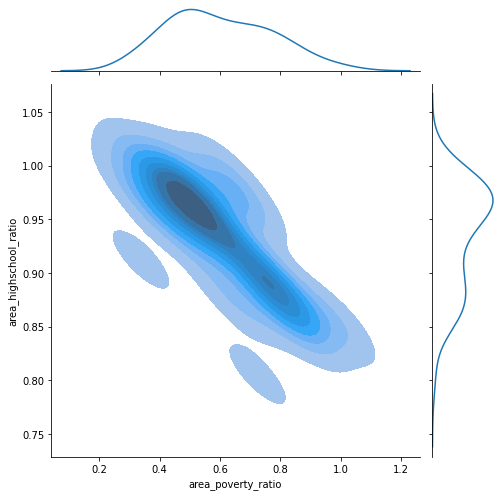

In [31]:
import warnings
warnings.filterwarnings('ignore') 

#area_poverty_ratio x ekseni içindir.
#area_highschool_ratio y ekseni içindir.
#size plotun büyüklüğüdür.
#kde -> kernel density estimation -> plot dışındaki çizgilerdir.
#bu çizgiler histogram olarak da düşünülebilir.
#bu çizgilere bakarak fakirlik oranının 0.5 noktasında top'a ulaştığı sonrasında giderek azaldığı görülmektedir.
#0.2 ve 1.2 değerlerinde fakirlik oranı yok denecek kadar azdır.
#liseden mezun olma oranına bakıldığında 0.98-0.99 aralığında top'a ulaştığı görülür.
#1.05 ile 0.80 değerlerinde liseden mezun olma oranı yok denecek kadar azdır.
#plotta yukarıdan aşağı doğru bir line var, bu da ters orantı demektir.
#x artarken y azalmaktadır.
#shade parametresi True olduğunda verilerin yoğunluğuna göre rengin koyuluğu ayarlanarak doldurulur.
#mavi rengin en koyu olduğu noktalarda yoğunluk fazladır.

g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde",shade=True, size=7)
plt.show()

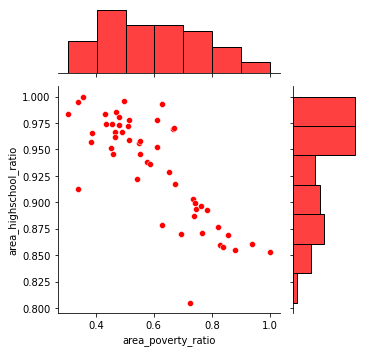

In [32]:
#joint plotla çizdirmek farklı yöntemler de vardır.
#data parametresine data adlı dataframe atandı.
#x ve y eksenleri dataframe'deki sütun isimleri belirtilerek verildi.
#size=5 ratio=3 verilmiştir.
#bu scatter plotların olduğu kısım 3 birimlik yer kaplayacak,histogramlar 1'er birimlik yer kaplayacak demektir.
#plotta fakirlik oranı arttıkça liseden mezun olma oranının azaldığı açık bir şekilde gözükür.
#histogramda 0.5 değerinde fakirlik oranının top yaptığı görülür, bu da dataframe'de fakirlik oranında en çok 0.5 değeri vardır demektir.
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data ,size=5 , ratio=3, color="r")

# **LM Plot**

Bu plot çiziminde fakirlik oranı ile 25 yaşından büyük insanların liseden mezun olma oranı karşılaştırılacaktır.

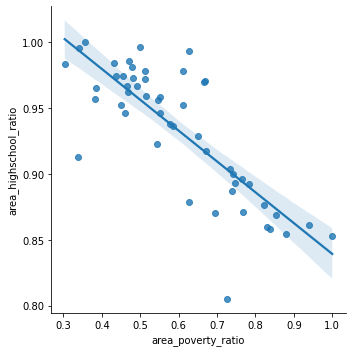

In [33]:
#lm plot linear regression çizimidir.
#bu plottaki line noktaların arasındaki en optimum noktadan geçer.
#bu line datayı ifade eden bir matematiksel modeldir.
#line incelendiğinde fakirlik oranının 1 olduğu değerde liseden mezun olma oranının 0.85 olduğu anlaşılır.
#bu line'a bakarak ters orantı olduğu anlaşılır.

#bu line'ın y = 1 - x gibi bir denkleme eşit olduğu düşünülebilir.
#yani x değeri iken y değerinin 1 olduğu görülür.

sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

# **KDE Plot**

Kernel density estimation joint plottaki kde türüdür, ancak bu plotta plotun etrafında çizgiler yoktur.

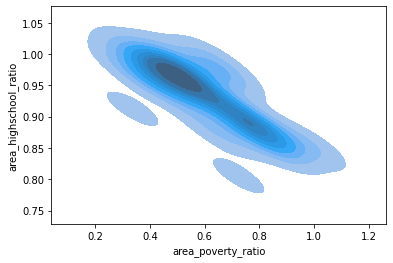

In [34]:
#shade parametresi True olduğunda verilerin yoğunluğuna göre rengin koyuluğu ayarlanarak doldurulur.
#cut parametresi kde plotunun büyüklüğüdür, parametredeki değer küçüldükçe çizim büyür.
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=3)
plt.show()

# **Violin Plot**

Violin plot iki feature arasındaki corelationa bakmak yerine datanın farklı featurelarının aralarındaki değerlerin dağılımına bakar.

Sadece sayılar değerleri alır.

In [35]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


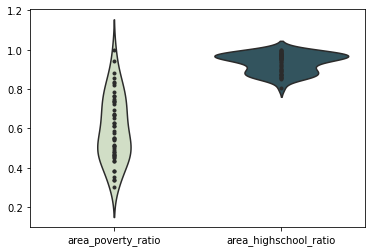

In [36]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3) #renk verilir.
sns.violinplot(data=data, palette=pal, inner="points") #inner="points" plotun içerisindeki noktalardır.
                                                       #bu noktaların her biri de data değeridir.
                                                       #area_poverty_rate sütununa bakıldığında en düşük değer 0.30 plottaki en alttaki noktadır.
                                                       #ondan sonraki iki nokta birbirine çok yakındır, çünkü birinin değeri 0.337 diğerinin 0.339'dur.
                                                       #yani datalar çok yakındır.
                                                       #area_highschool_rate sıralı olmadığı için en büyük değere bakılabilir.
                                                       #plotta da dataframe'de de en büyük değer 1'dir.
                                                       #burada eyaletler yoktur, çünkü violin plot sadece sayısal değerleri alır.
                                                       #joint plottaki histogramda area_poverty_rate'in top değerinin 0.5 anlaşılmıştı.
                                                       #violin plotta da aynı şekilde çizimin en çok genişlediği alan top değerini verir.
                                                       #area_highschool_rate sütunu için de joint plottaki histogramda top değerler 1-0.95 arasındaydı.
                                                       #violin plota bakıldığında da aynı değer aralığında çizim genişlemiştir, buradan datanın yoğunluğu anlaşılır.
                                                       #datanın yoğunluğu nerede fazlaysa datanın ortalaması yaklaşık olarak o değer aralığında çıkacaktır denilebilir.
plt.show()

In [37]:
data.area_poverty_ratio.mean()   #çizime bakarak fakirlik oranı için top değerinin 0.5 olduğu belirtilmişti.
                                 #ortalamanın da bu değere çok yakın çıktığı görülür.

0.5996247186896554

In [38]:
data.area_highschool_ratio.mean() #çizime bakılarak liseden mezun olma oranının top noktasının 1.0-0.95 arası olduğu belirtilmişti.
                                  #ortalamanın çok yakın çıktığı görülür.

0.9328796631688943

# **Confusion Matrix**

Corelation iki sayısal değer arasında olur, stringler arasında olamaz.

New York yazısı ile İstanbul yazısı arasında bir ilişki hesaplanamayacağından sayısal değerlere bakılır.

In [39]:
data.corr() #iki feature arasındaki corealation'a bakıldığında negatif yönlü güçlü bir corelation olduğu anlaşır.
            #daha önce yapılan çizimlerde de iki feature arasında ters orantı olduğu anlaşılmıştı.

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


Heatmap ile corelation map'in anlaşılabilirliği kolaylaşır ve görsellik kazandırılır.

Heatmapteki color bar renklerin değerleri bulunur.

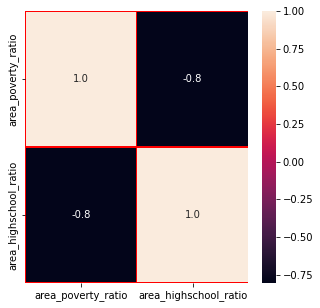

In [40]:
#correlation map
f,ax = plt.subplots(figsize=(5, 5)) #figür oluşturuldu, boyutu verildi.
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
#annot=True olduğunda corelation map'teki sayısal değerler heatmap'e yazılır, annot=False olsaydı sadece renk gözücekti.
#linewidths parametresi ile hücreler arasındaki kırmızı çizginin kalınlığı belirlenir.
#linecolor=red parametresi ile bu çizginin rengi belirlenir.
#fmt='.1f' parametresi ile virgülden sonraki 1 basamak alınır.
#ax=ax ile figür oluşturulurken yaratılan plotun içine heatmap'in koyulacağı anlamına gelir.
plt.show()

# **Pair Plot**

Pair plotta veri çerçevesi boyunca, sayısal sütunlar için çift yönlü ilişkiler çizilir.

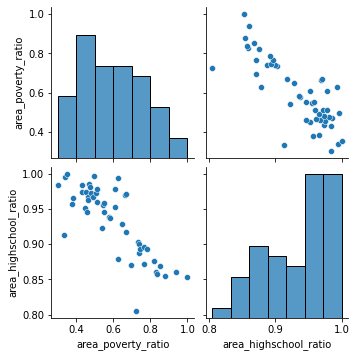

In [41]:
sns.pairplot(data) #sol attaki scatter plota bakıldığında fakirlik oranı arttıkça liseden mezun olma oranının azaldığı görülür.
                   #sağ üstteki scatter plotta liseden mezun olma oranı arttıkça fakirlik oranı azalır.
                   #bu iki scatter plotta x ve y'de bulunan sütunlar değişmiştir.
                   #sol üstteki histogram fakirlik oranının histogramıdır.
                   #sağ alttaki histogram liseden mezun olma oranının histogramıdır, bu iki histogramdan top değerler anlaşılabilir.
                   #histogram ile dataframe'deki dataların sıklıkları anlaşılmaktadır.

plt.show()